In [1]:
!pip install xgboost

In [2]:
!pip install lightgbm

# Exploratory Data Analysis (EDA)

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

**Training Dataset**

In [4]:
#Load the Titanic dataset
Data_train= pd.read_csv('Titanic_train.csv')
Data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#describe the data
Data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
Data_train.shape

(891, 12)

In [7]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#check the data types
Data_train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [9]:
#checking the null values
Data_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
#check the unique values
Data_train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


#check the unique values of the columns

In [11]:
Data_train['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [12]:
Data_train['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [13]:
Data_train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [14]:
Data_train['Sex'].value_counts()

,count
Sex,
male,577
female,314


#preprocess the data

In [15]:
# droping columns those are not needed for prediction
Data_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace = True)

In [16]:
#check the dataset
Data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# Feature list
Features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titles = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Boxplot

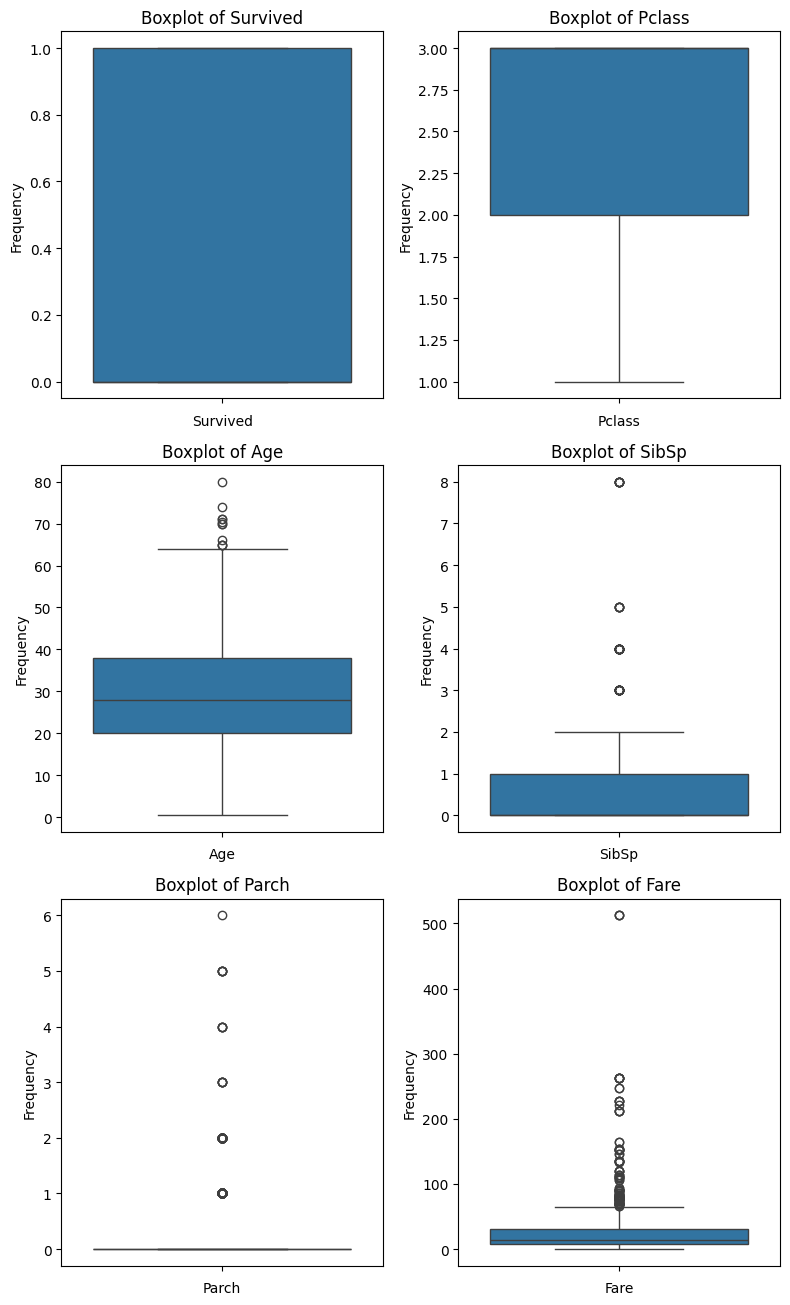

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(8, 14))  # Adjust the size as needed
for i, column in enumerate(titles):
    sns.boxplot(Data_train[column],ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot of {column}')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Histogram

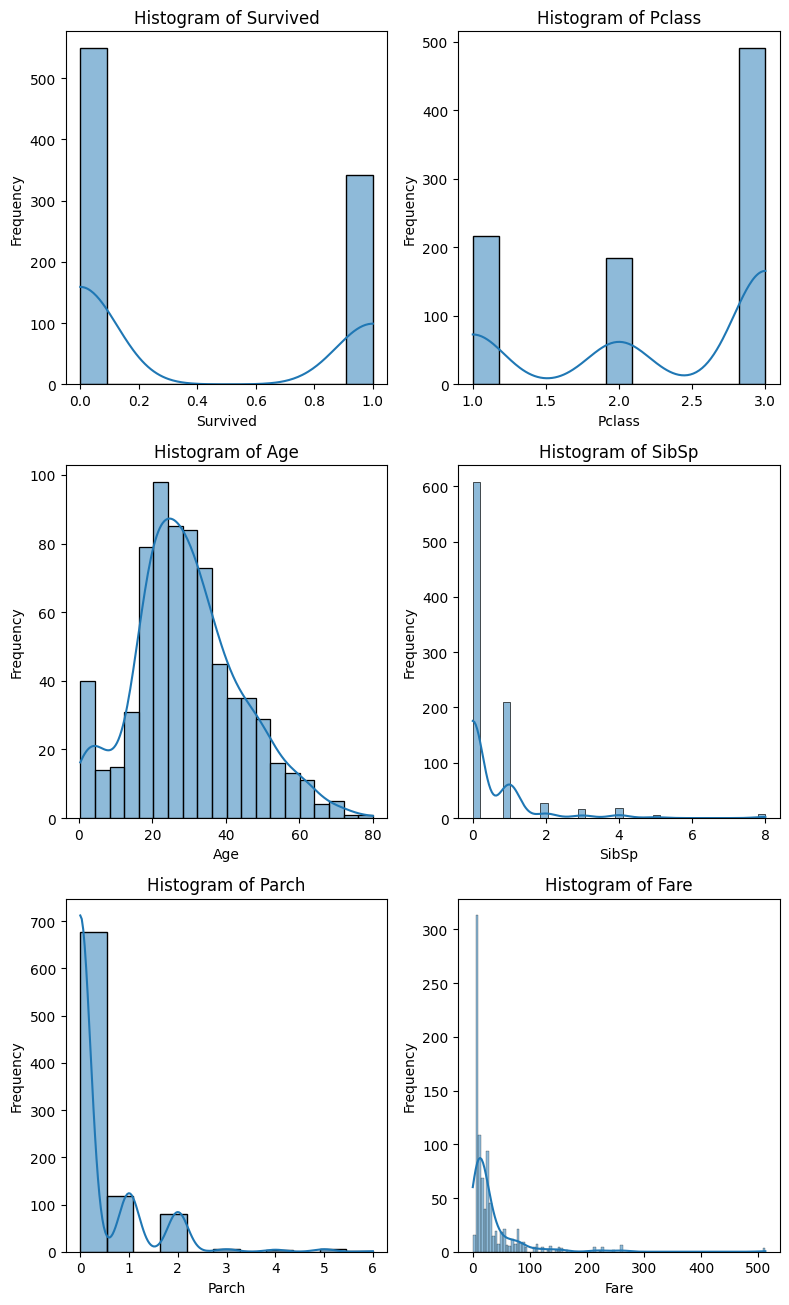

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(8, 14))  # Adjust the size as needed
for i, column in enumerate(Features):
    sns.histplot(Data_train[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histogram of {column}')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# scatter plot

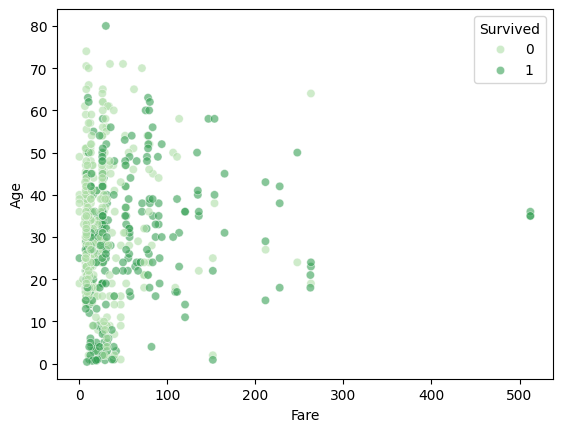

In [20]:
sns.scatterplot(x='Fare', y='Age', hue='Survived', palette='Greens',data=Data_train, alpha=0.6)
plt.show()

# Boxplot

<Figure size 1500x600 with 0 Axes>

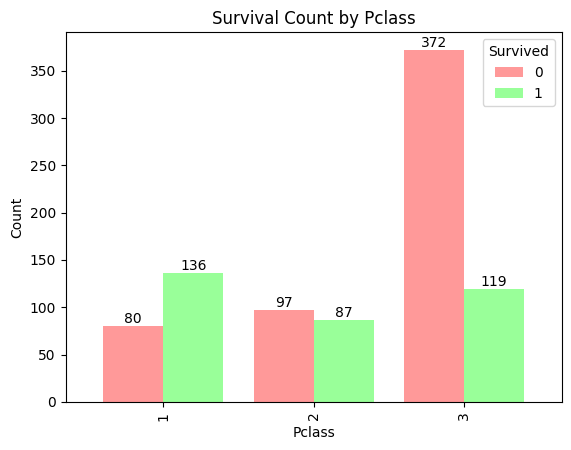

In [21]:
cross_tab = pd.crosstab(Data_train.Pclass, Data_train.Survived)
plt.figure(figsize=(15, 6))

#colors of the bars (set custom colors )
colors = ['#FF9999', '#99FF99']

ax = cross_tab.plot(kind='bar',color=colors,width=0.8)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

for container in ax.containers:  # Adding data labels
    ax.bar_label(container)

plt.show()

<Figure size 1500x600 with 0 Axes>

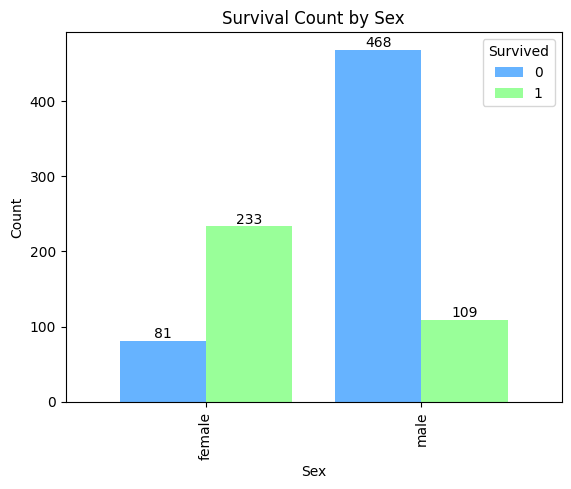

In [22]:
cross_tab = pd.crosstab(Data_train.Sex, Data_train.Survived)
plt.figure(figsize=(15, 6))
# colors of the bars
colors = [ '#66B3FF', '#99FF99']

ax = cross_tab.plot(kind='bar',color=colors,width=0.8)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

for container in ax.containers:  # Adding data labels
    ax.bar_label(container)

plt.show()

<Figure size 1500x600 with 0 Axes>

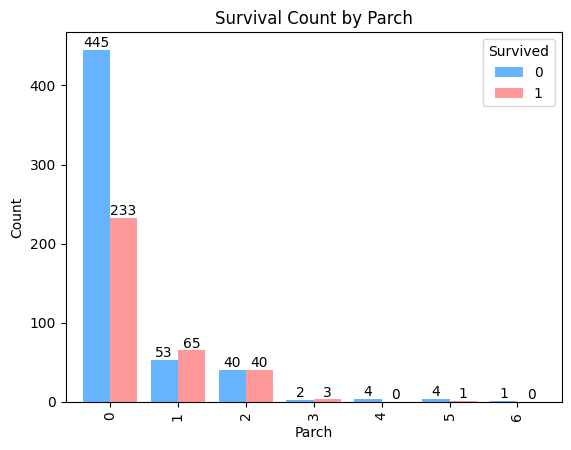

In [23]:
cross_tab = pd.crosstab(Data_train.Parch, Data_train.Survived)
plt.figure(figsize=(15, 6))
# colors of the bars
colors = [ '#66B3FF', '#FF9999']
ax = cross_tab.plot(kind='bar',color=colors,width=0.8)
plt.title('Survival Count by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

<Figure size 1500x600 with 0 Axes>

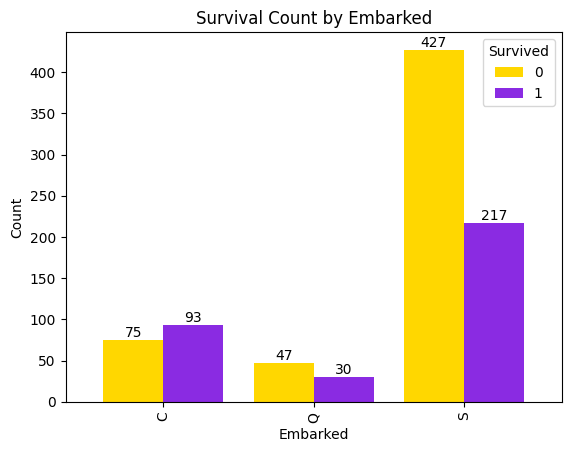

In [24]:
cross_tab = pd.crosstab(Data_train.Embarked, Data_train.Survived)
plt.figure(figsize=(15, 6))
# colors of the bars
colors = ['#FFD700', '#8A2BE2']
ax = cross_tab.plot(kind='bar',color=colors,width=0.8)
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [25]:
Data_train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Data Preprocessing

In [26]:
# preprocess the data
# Handle missing values
Data_train['Age'].fillna(Data_train['Age'].median(), inplace=True)
Data_train['Embarked'].fillna(Data_train['Embarked'].mode()[0], inplace=True)

In [27]:
# Convert categorical variables into dummy  variables
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in Data_train.select_dtypes(include=['object']).columns:
    Data_train[column] = label_encoder.fit_transform(Data_train[column])
Data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [28]:
Data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [29]:
Scaler = MinMaxScaler()

# Fit and transform the specified columns
Data_train[['Age','Fare']] = Scaler.fit_transform(Data_train[['Age','Fare']])

In [30]:
# Convert categorical variables into dumm variables
Data_train= pd.get_dummies(Data_train, columns=['Sex', 'Embarked'], drop_first=True,dtype= float)
Data_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2
0,0,3,0.271174,1,0,0.014151,1.0,0.0,1.0
1,1,1,0.472229,1,0,0.139136,0.0,0.0,0.0
2,1,3,0.321438,0,0,0.015469,0.0,0.0,1.0
3,1,1,0.434531,1,0,0.103644,0.0,0.0,1.0
4,0,3,0.434531,0,0,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0.334004,0,0,0.025374,1.0,0.0,1.0
887,1,1,0.233476,0,0,0.058556,0.0,0.0,1.0
888,0,3,0.346569,1,2,0.045771,0.0,0.0,1.0
889,1,1,0.321438,0,0,0.058556,1.0,0.0,0.0


# Building Predictive Models

In [38]:
#split the data
x = Data_train.iloc[:,1:]
y = Data_train.iloc[:,0]

In [39]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2
0,3,0.271174,1,0,0.014151,1.0,0.0,1.0
1,1,0.472229,1,0,0.139136,0.0,0.0,0.0
2,3,0.321438,0,0,0.015469,0.0,0.0,1.0
3,1,0.434531,1,0,0.103644,0.0,0.0,1.0
4,3,0.434531,0,0,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,2,0.334004,0,0,0.025374,1.0,0.0,1.0
887,1,0.233476,0,0,0.058556,0.0,0.0,1.0
888,3,0.346569,1,2,0.045771,0.0,0.0,1.0
889,1,0.321438,0,0,0.058556,1.0,0.0,0.0


In [33]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [34]:
#split into Traing and testing
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state= 41)


In [35]:
x_train.shape,x_test.shape

((712, 8), (179, 8))

In [36]:
y_train.shape,y_test.shape

((712,), (179,))

# XGBOOST

#Hyperparameter Tuning

In [40]:
# Determine the number of unique classes
num_classes = len(set(y_train))

# Define the parameter grid
params = {
    'n_estimators' : [24,25,26,28], # randomly select no. of models
    'learning_rate' : [0.1, 0.01, 0.001], # alpha between 0 to 1
    'max_depth' : [4,12,14,16],
    'eval_metric': ['logloss', 'mlogloss', 'merror', 'error'],
    'num_class': [num_classes]
}

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Model = xgb.XGBClassifier(subsample=0.5, objective='multi:softmax')

In [42]:

grid = GridSearchCV(estimator=Model, param_grid=params, scoring='accuracy', cv=5)
grid.fit(x_train,y_train)

# It is GridSearchCV i.e. kfold cross validation is also done


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'eval_metric': ['logloss', 'mlogloss', 'merror',
                                         'error'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [4, 12, 14, 16],
                         'n_estimators': [24, 25, 26, 28], 'num_class': [2]},
             scoring='accuracy')

In [43]:
grid.best_params_   # best parameter

{'eval_metric': 'logloss',
 'learning_rate': 0.1,
 'max_depth': 14,
 'n_estimators': 26,
 'num_class': 2}

In [44]:
 # best parameter selected for model
Final_Model = grid.best_estimator_


In [45]:
 # for training dataset
y_prediction_train = Final_Model.predict(x_train)
confusion_matrix_train= confusion_matrix(y_train,y_prediction_train)
print(confusion_matrix_train)
print(classification_report(y_train,y_prediction_train))

[[425  19]
 [ 46 222]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       444
           1       0.92      0.83      0.87       268

    accuracy                           0.91       712
   macro avg       0.91      0.89      0.90       712
weighted avg       0.91      0.91      0.91       712



In [46]:
# for testing dataset
y_prediction_test = Final_Model.predict(x_test)
confusion_matrix_test= confusion_matrix(y_test,y_prediction_test)
print(confusion_matrix_test)
print(classification_report(y_test,y_prediction_test))

[[100   5]
 [ 22  52]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       105
           1       0.91      0.70      0.79        74

    accuracy                           0.85       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



# ROC Curve
The ROC curve plots the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR).

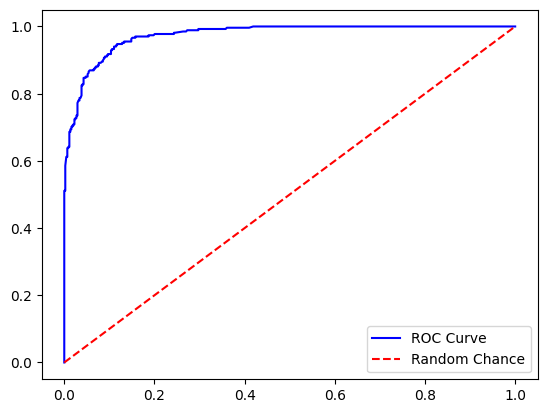

In [47]:
#predict the probabilities and calculate the roc curve
y_train_probability = Final_Model.predict_proba(x_train)[:,1]
fpr, tpr, thresh = roc_curve(y_train,y_train_probability)

# Plot the ROC curve with a solid blue line
plt.plot(fpr,tpr,color='blue', linestyle='-', label='ROC Curve')
plt.plot([0,1],[0,1],color='red',linestyle='dashed',label='Random Chance')

# Show the legend
plt.legend()
plt.show()


# Area Under Curve
AUC measures the model's ability to distinguish between classes.
A higher AUC indicates better model performance.

In [48]:
auc = roc_auc_score(y_train,y_prediction_train)
print(auc*100)

89.27827080812155


# LightGBM

In [49]:
# Define the parameter grid

parameters = {
    'n_estimators': [100, 200, 300],           # number of trees
    'max_depth': [6, 10, 15],                  #depth
    'learning_rate': [0.05, 0.01, 0.005],      # Slower learning rate for more fine-grained learning
    'num_leaves': [20, 31, 60],                # Different leaf sizes to control model complexity
    'boosting_type': ['gbdt'],                 # using Gradient Boosting Decision Trees
    'objective': ['binary'],                   # Binary classification
    'metric': ['binary_logloss'],              # Log-loss for binary classification
    'subsample': [0.7, 0.8, 0.9],              # Different subsample rates to prevent overfitting
    'max_bin': [63, 127, 255],                 # Varying number of bins for discretization of features
    'colsample_bytree': [0.6, 0.8, 1.0]        # Fraction of features to be randomly chosen for each tree
}

# Initialize the LightGBM model
Model = lgb.LGBMClassifier()

# Initialize GridSearchCV
grid = GridSearchCV(estimator=Model, param_grid=parameters, scoring='accuracy', cv=3)

# Fit the model
grid.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 475, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376842 -> initscore=-0.502974
[LightGBM] [Info] Start training from score -0.502974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.05, 0.01, 0.005],
                         'max_bin': [63, 127, 255], 'max_depth': [6, 10, 15],
                         'metric': ['binary_logloss'],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 31, 60], 'objective': ['binary'],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [50]:
grid.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_bin': 127,
 'max_depth': 6,
 'metric': 'binary_logloss',
 'n_estimators': 100,
 'num_leaves': 20,
 'objective': 'binary',
 'subsample': 0.7}

In [51]:
# best parameter selected for model
Final_Model2 = grid.best_estimator_

In [59]:
  # for training dataset
y_prediction_train = Final_Model2.predict(x_train)
confusion_matrix_train = confusion_matrix(y_train,y_prediction_train)
print(confusion_matrix_train)
print(classification_report(y_train,y_prediction_train))

[[422  22]
 [ 59 209]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       444
           1       0.90      0.78      0.84       268

    accuracy                           0.89       712
   macro avg       0.89      0.87      0.88       712
weighted avg       0.89      0.89      0.88       712



In [61]:
 #testing dataset
y_prediction_test = Final_Model2.predict(x_test)
confusion_matrix_test= confusion_matrix(y_test,y_prediction_test)
print(confusion_matrix_test)
print(classification_report(y_test,y_prediction_test))

[[101   4]
 [ 22  52]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       105
           1       0.93      0.70      0.80        74

    accuracy                           0.85       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.87      0.85      0.85       179



**ROC Curve**

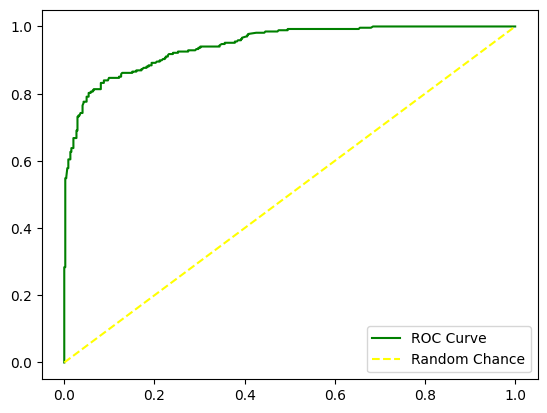

In [57]:
#predict the probabilities and calculate the roc curve
y_train_probability = Final_Model2.predict_proba(x_train)[:,1]
fpr, tpr, thresh = roc_curve(y_train,y_train_probability)

# Plot the ROC curve with a solid blue line
plt.plot(fpr,tpr,color='green', linestyle='-', label='ROC Curve')
plt.plot([0,1],[0,1],color='yellow',linestyle='dashed',label='Random Chance')

# Show the legend
plt.legend()
plt.show()


**Area Under Curve**

In [58]:
auc = roc_auc_score(y_train,y_prediction_train)
print(auc*100)

86.51505983595537


**XGBoost (XGBM):** Strengths: High precision, recall, and F1-score on both training and test data, especially for class 0. High overall accuracy on both training (0.91) and test data (0.85). Weaknesses: Slightly lower recall for class 1 on the test data (0.70), indicating some false negatives. Shows a degree of overfitting, as indicated by the drop in accuracy from training to test data.

**LightGBM (LGBM):** Strengths: Good precision, recall, and F1-score on both training and test data, particularly for class 0. High overall accuracy on both training (0.89) and test data (0.84). Weaknesses: Lower recall for class 1 on the training data (0.78) and test data (0.69), indicating potential false negatives. Performance metrics are slightly lower compared to XGBoost, especially for class 1.

**Testing Dataset**

In [112]:
#load the dataset
data_test = pd.read_csv('Titanic_test.csv')
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [113]:
data_test.shape

(418, 11)

In [114]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [115]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [116]:
data_test.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [117]:
#check the unique values of the sex  column
data_test['Sex'].value_counts()


,count
Sex,
male,266
female,152


In [118]:
#check the unique values of the Embarked column
data_test['Embarked'].value_counts()

,count
Embarked,
S,270
C,102
Q,46


In [119]:
  # drop the unwanted columns
data_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data_test['Age'].fillna(data_test['Age'].median(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].median(), inplace=True)
data_test['Embarked'].fillna(data_test['Embarked'].mode()[0], inplace=True)

In [120]:
# Convert categorical variables into dummy indicator variables
data_test= pd.get_dummies(data_test, columns=['Sex', 'Embarked'], drop_first=True,dtype= float)
data_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [121]:
data_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [122]:
 # prediction of testing dataset
prediction_test = Final_Model2.predict(data_test)
prediction_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
# Convert prediction_test to a DataFrame
prediction_test_df = pd.DataFrame(prediction_test, columns=['Prediction'])
predictions_test = data_test.copy()  #  copy of the test DataFrame
predictions_test['Prediction'] = prediction_test_df
predictions_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Prediction
0,3,34.5,0,0,7.8292,1.0,1.0,0.0,0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0,0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0,0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,1.0,0.0,1.0,0
414,1,39.0,0,0,108.9000,0.0,0.0,0.0,1
415,3,38.5,0,0,7.2500,1.0,0.0,1.0,0
416,3,27.0,0,0,8.0500,1.0,0.0,1.0,0


In [124]:
# unique counts for survival and not survival
predictions_test['Prediction'].value_counts()

,count
Prediction,
0,311
1,107


In [127]:
group=predictions_test.groupby('Prediction')  #group by prediction
group             # it shows only object it will be just stored somewhere

In [128]:
 # group by
for x,y in group:
    print(x,y)
    print('-'*60)     # result predictionwise 0 and 1

0      Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0         3  34.5      0      0   7.8292       1.0         1.0         0.0   
1         3  47.0      1      0   7.0000       0.0         0.0         1.0   
2         2  62.0      0      0   9.6875       1.0         1.0         0.0   
3         3  27.0      0      0   8.6625       1.0         0.0         1.0   
4         3  22.0      1      1  12.2875       0.0         0.0         1.0   
..      ...   ...    ...    ...      ...       ...         ...         ...   
412       3  28.0      0      0   7.7750       0.0         0.0         1.0   
413       3  27.0      0      0   8.0500       1.0         0.0         1.0   
415       3  38.5      0      0   7.2500       1.0         0.0         1.0   
416       3  27.0      0      0   8.0500       1.0         0.0         1.0   
417       3  27.0      1      1  22.3583       1.0         0.0         0.0   

     Prediction  
0             0  
1             0  
2      

**Comparative Analysis**

In [129]:
#XGBoost

In [130]:
 # on testing dataset
y_prediction_test = Final_Model.predict(x_test)
confusion_matrix_test = confusion_matrix(y_test,y_prediction_test)
print(confusion_matrix_test)
print(classification_report(y_test,y_prediction_test))

[[100   5]
 [ 22  52]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       105
           1       0.91      0.70      0.79        74

    accuracy                           0.85       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



In [131]:
#LightGBM

In [132]:
#on testing dataset
y_prediction_test = Final_Model2.predict(x_test)
confusion_matrix_test = confusion_matrix(y_test,y_prediction_test)
print(confusion_matrix_test)
print(classification_report(y_test,y_prediction_test))

[[101   4]
 [ 22  52]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       105
           1       0.93      0.70      0.80        74

    accuracy                           0.85       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.87      0.85      0.85       179



**LightGBM vs. XGBoost**

**LightGBM:** Faster training, especially with large datasets due to its histogram-based algorithm and leaf-wise growth strategy.**XGBoost:** Generally slower but more robust for smaller datasets and often more stable with default settings.
**Accuracy:**Both can achieve similar accuracy, but LightGBM can sometimes overfit due to its aggressive leaf-wise tree growth. XGBoost uses depth-wise tree growth, which is more conservative.
LightGBM is preferred for speed and large-scale problems, while XGBoost is often more stable and reliable for smaller or medium datasets.

**Feature Importance in XGBoost (XGB) and LightGBM (LGBM)**

Both XGBoost and LightGBM provide ways to assess feature importance during the training and testing of models. Understanding which features have the most influence on predictions helps in model interpretation, optimization, and debugging.